In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:/Work/DataFrames/100000_UK_used_car/bmw.csv')

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
len(df)

10781

Человеческое обучение - это создание алгоритма вручную, мы как люди будем вырабатывать алгоритм. А что за алгоритм то? Алгоритм определения цены по параметрам автомобиля. Проанализировав эти параметры, мы сможем определять цену автомобиля.

# Обучающая и тестовая выборка (train and test)

Тестовая выборка - 20-30 % от основных данных

sklearn - основная библиотека

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df)   #разбивается с помощью случайных выборок

In [8]:
len(train) + len(test) == len(df)

True

In [9]:
len(test) / len(df)

0.2500695668305352

Можно проконтролировать разбивку с помощью random_state

In [10]:
train, test = train_test_split(df,random_state=42)

In [11]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5


In [12]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5


## Анализ данных. Смотрим только на тестовую выборку

In [13]:
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

Пропусков нет - это очень-очень хорошо!

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

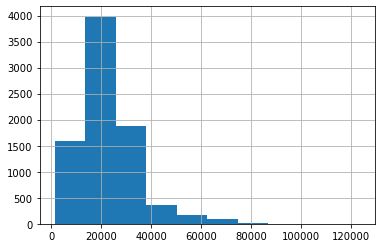

In [15]:
train['price'].hist()

Цена меняется от нуля до 120 тысяч фунтов. Большинство машин сосредоточено в пределах 20 тысяч.

In [16]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

1445 < ***price*** < 123456 \
***mean*** = 22668 \
***median*** = 20022

Применим сводник:

In [17]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


Как видим, у нас мало очень данных по старым машинам. Нормальные данные с 2010ого года.

<AxesSubplot:xlabel='year'>

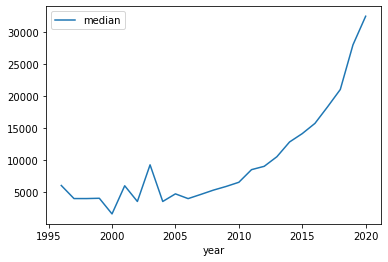

In [18]:
train.groupby('year')['price'].agg(['median']).plot()

# Baseline

Бэйзлайн - исходная точка, ошибка модели, от которой мы будем отталкиваться. Мы будем от него исходить.

In [19]:
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [20]:
train['price_pred_mean'] = train['price'].mean()

In [21]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645


Сначала посмотрим на трейне, затем на тесте.

In [22]:
train['err'] = train['price_pred_mean'] - train['price'] 

In [23]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645


In [24]:
import numpy as np

In [25]:
np.mean([-2,2])

0.0

In [26]:
train['err_abs'] = abs(train['err'])

In [27]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645


Средняя ошибка:

In [28]:
train['err_abs'].mean()

8450.556631461675

In [29]:
train['err_abs_pct'] = train['err_abs'] / train['price']

Средняя ошибка в процентах:

In [30]:
train['err_abs_pct'].mean()

0.48316912602731094

Сейчас возьмем вместо среднего медиану:

In [31]:
train['price_pred_median'] = train['price'].median()

In [32]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0


Сейчас воспользуемся функциями *sklearn*: ***mean_absolute_error***, ***mean_absolute_percentage_error***

In [33]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Среднее в качестве бэйзлайна:

In [34]:
mean_absolute_error(train['price'],train['price_pred_mean'])

8450.556631461715

In [35]:
mean_absolute_percentage_error(train['price'],train['price_pred_mean'])

0.48316912602731443

Медиана в качестве бэйзлайна:

In [36]:
mean_absolute_error(train['price'],train['price_pred_median'])

8220.5146567718

In [37]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.41711111879393314

Выберем медиану в качестве бейзлайна для модели:

In [38]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5


In [39]:
train['price'].median()

20022.0

С обучающей переводим на тестовую:

In [40]:
test['price_pred_median'] = train['price'].median()

In [41]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0


In [42]:
mean_absolute_error(test['price'],test['price_pred_median'])

8211.845697329376

In [43]:
mean_absolute_percentage_error(test['price'],test['price_pred_median'])

0.409212791738344

## Алгоритм на основе года

In [44]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [45]:
model_year_mean = train.groupby('year')['price'].mean().reset_index()

In [46]:
model_year_mean.head()

,year,price
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3980.0
4,2000,1550.0


In [47]:
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [48]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [49]:
model_year_mean.head()

,year,price_pred_year_mean
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3980.0
4,2000,1550.0


Давайте замержем одну табличку к другой(тестовой):

In [50]:
train = train.merge(model_year_mean, how='left', on='year')

In [51]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313


In [52]:
mean_absolute_error(train['price'],train['price_pred_median'])

8220.5146567718

In [53]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.41711111879393314

In [54]:
mean_absolute_error(train['price'],train['price_pred_year_mean'])

5474.243598515644

In [55]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_mean'])

0.2447228468704618

In [56]:
test = test.merge(model_year_mean,how='left',on='year')

In [57]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394


In [58]:
test.isna().mean()

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [59]:
mean_absolute_error(test['price'],test['price_pred_median'])

8211.845697329376

In [60]:
mean_absolute_percentage_error(test['price'],test['price_pred_median'])

0.409212791738344

In [61]:
mean_absolute_error(test['price'],test['price_pred_year_mean'])

5426.271071211102

In [62]:
mean_absolute_percentage_error(test['price'],test['price_pred_year_mean'])

0.23933940428873632

## Медиана цены на машину по году

In [63]:
model_year_median = train.groupby('year')['price'].median().reset_index()
model_year_median.head()

,year,price
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0


In [64]:
model_year_median = model_year_median.rename({'price':'price_predic_year_median'},axis=1)
model_year_median.head()

,year,price_predic_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0


In [65]:
train = train.merge(model_year_median, how='left', on='year')

In [66]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5


In [77]:
mean_absolute_error(train['price'],train['price_pred_year_mean'])

5474.243598515644

In [78]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_mean'])

0.2447228468704618

In [79]:
mean_absolute_error(train['price'],train['price_predic_year_median'])

5232.327891156463

In [80]:
mean_absolute_percentage_error(train['price'],train['price_predic_year_median'])

0.21723436816638503

In [81]:
test = test.merge(model_year_median,how='left',on='year')

In [82]:
test.isna().mean()

model                       0.0
year                        0.0
price                       0.0
transmission                0.0
mileage                     0.0
fuelType                    0.0
tax                         0.0
mpg                         0.0
engineSize                  0.0
price_pred_median           0.0
price_pred_year_mean        0.0
price_predic_year_median    0.0
dtype: float64

In [83]:
mean_absolute_error(test['price'],test['price_pred_year_mean'])

5426.271071211102

In [84]:
mean_absolute_percentage_error(test['price'],test['price_pred_year_mean'])

0.23933940428873632

In [87]:
mean_absolute_error(test['price'],test['price_predic_year_median'])

5240.677299703264

In [88]:
mean_absolute_percentage_error(test['price'],test['price_predic_year_median'])

0.21478293590399475

## Добавим еще переменную для улучшения модели

In [89]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5


<AxesSubplot:xlabel='engineSize'>

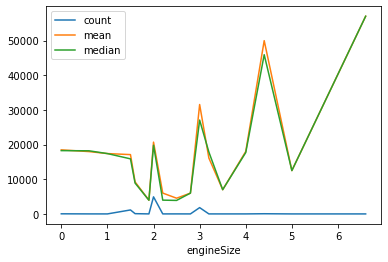

In [92]:
train.groupby('engineSize')['price'].agg(['count','mean','median']).plot()

In [93]:
train.groupby('engineSize')[['price','year']].agg(['count','mean','median'])

price                         year                     
           count          mean   median count         mean  median
engineSize                                                        
0.0           32  18469.906250  18250.0    32  2015.843750  2017.0
0.6            6  17973.333333  18200.0     6  2016.333333  2016.5
1.0            1  17400.000000  17400.0     1  2015.000000  2015.0
1.5         1146  17104.345550  15881.5  1146  2017.582024  2017.0
1.6           75   9230.240000   8890.0    75  2013.626667  2014.0
1.9            5   3968.000000   3950.0     5  1998.400000  1999.0
2.0         4925  20697.721624  19792.0  4925  2017.068629  2017.0
2.2            4   6010.000000   3972.5     4  2003.250000  2003.0
2.5            8   4532.375000   3892.5     8  2005.250000  2005.5
2.8            1   5995.000000   5995.0     1  1996.000000  1996.0
3.0         1818  31545.723872  27058.0  1818  2017.116062  2017.0
3.2            3  16116.333333  17850.0     3  2004.333333  2004.0
3.5            1   6990.000000   6990.0     1  2002.000000  2002.0
4.0            4  18012.250000  17700.0     4  2010.500000  2010.0
4.4           54  49960.666667  45904.5    54  2017.129630  2018.0
5.0            1  12495.000000  12495.0     1  2006.000000  2006.0
6.6            1  57000.000000  57000.0     1  2017.000000  2017.0

In [94]:
train.groupby('engineSize')['price'].agg(['count','mean','median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [95]:
def engine_group(x):
    if x <= 1.5:
        return '<=1.5'
    if x <= 2:
        return '<=2'
    return '>2'

In [97]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [98]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5


In [99]:
t = train.groupby('engine_group')['price'].agg(['count','mean','median'])
t

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


In [101]:
t['count'].sum() == len(train)

True

Другой способ: 

In [102]:
model_year_engine_median = train.groupby(['year','engine_group'])['price'].median().reset_index()

In [103]:
model_year_engine_median

,year,engine_group,price
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


Усложнилась логика:

In [109]:
t = train.pivot_table(index='year',columns='engine_group', values='price',aggfunc='median')

In [107]:
import seaborn as sns

<AxesSubplot:xlabel='engine_group', ylabel='year'>

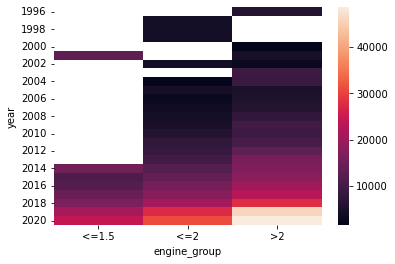

In [110]:
sns.heatmap(t)

Чем ниже и правее, тем светлее, тем выше цена.

Джойним к трейну и тесту.

In [112]:
model_year_engine_median = model_year_engine_median.rename({'price':'price_pred_year_engine_median'},axis=1)
model_year_engine_median.head()

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0


In [113]:
train = train.merge(model_year_engine_median, how='left', on=['year','engine_group'])

In [114]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,10999.0


In [116]:
mean_absolute_error(train['price'],train['price_predic_year_median'])

5232.327891156463

In [117]:
mean_absolute_percentage_error(train['price'],train['price_predic_year_median'])

0.21723436816638503

In [118]:
mean_absolute_error(train['price'],train['price_pred_year_engine_median'])

3659.774273345702

In [119]:
mean_absolute_percentage_error(train['price'],train['price_pred_year_engine_median'])

0.1582922021242831

In [121]:
model_year_engine_median.head()

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0


In [123]:
test['engine_group'] = test['engineSize'].apply(engine_group)
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5


In [124]:
test = test.merge(model_year_engine_median,how='left',on=['year','engine_group'])

In [125]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2,11945.0
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2,45980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5,20980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0


In [126]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_predic_year_median         0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

In [127]:
test[test['price_pred_year_engine_median'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2,NaN


In [128]:
def error(y_true,y_pred):
    print(mean_absolute_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))

In [131]:
error(train['price'],train['price_predic_year_median'])

5232.327891156463
0.21723436816638503


In [132]:
error(test['price'],test['price_predic_year_median'])

5240.677299703264
0.21478293590399475


In [134]:
error(train['price'],train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [136]:
test_no_nan = test.dropna().copy()

In [138]:
error(test_no_nan['price'],test_no_nan['price_pred_year_engine_median'])

3790.014291017075
0.16270961023342095


# Улучшение модели

In [139]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,10999.0


In [140]:
train.groupby('transmission')['price'].agg(['count','mean','median'])

,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


In [144]:
print('Количестов условий в моделе:', len(model_year_engine_median))

Количестов условий в моделе: 51


In [145]:
model_year_engine_median

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


Сгруппируем по годам

In [146]:
train.groupby('year')['price'].agg(['count','median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


Объединим все до 2010. 

In [147]:
pd.cut(train['year'],[0,2010,2012,2014,2016,2018,float('inf')])

0       (2012.0, 2014.0]
1          (2018.0, inf]
2       (2014.0, 2016.0]
3          (2018.0, inf]
4       (2014.0, 2016.0]
              ...       
8080    (2016.0, 2018.0]
8081    (2014.0, 2016.0]
8082       (2018.0, inf]
8083    (2014.0, 2016.0]
8084    (2014.0, 2016.0]
Name: year, Length: 8085, dtype: category
Categories (6, interval[float64, right]): [(0.0, 2010.0] < (2010.0, 2012.0] < (2012.0, 2014.0] < (2014.0, 2016.0] < (2016.0, 2018.0] < (2018.0, inf]]

In [148]:
train['year_group'] = pd.cut(train['year'],[0,2010,2012,2014,2016,2018,float('inf')])

In [149]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median,year_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,9990.0,"(2012.0, 2014.0]"
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]"
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,18144.5,"(2014.0, 2016.0]"
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,27294.0,"(2018.0, inf]"
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,10999.0,"(2014.0, 2016.0]"


In [150]:
train.groupby('year_group')['price'].agg(['count','median'])

,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


In [152]:
model_year_engine_group_median = train.groupby(['year_group','engine_group'])['price'].median().reset_index()

In [153]:
model_year_engine_group_median

,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,8470.0
5,"(2010.0, 2012.0]",>2,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2,10998.0
8,"(2012.0, 2014.0]",>2,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


In [155]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price':'pred_price_year_engine_group_median'},axis=1)

In [156]:
train = train.merge(model_year_engine_group_median,how='left',on=['year_group','engine_group'])

In [157]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_predic_year_median,engine_group,price_pred_year_engine_median,year_group,pred_price_year_engine_group_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,9990.0,"(2012.0, 2014.0]",10998.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]",21500.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,18144.5,"(2014.0, 2016.0]",19497.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,27294.0,"(2018.0, inf]",27990.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,10999.0,"(2014.0, 2016.0]",11557.0


In [158]:
error(train['price'],train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [159]:
error(train['price'],train['pred_price_year_engine_group_median'])

3827.4336425479282
0.1693848259731495


In [160]:
model_year_engine_trn_group_median = (train.groupby(['year_group',
                                                     'engine_group',
                                                     'transmission'])
                                            ['price'].median()
                                                     .reset_index())

In [161]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [162]:
model_year_engine_trn_group_median = model_year_engine_trn_group_median.rename({'price':'price_pred_year_engine_trn_median'},axis=1)

In [163]:
train = train.merge(model_year_engine_trn_group_median,
                    how='left',
                    on=['year_group','engine_group','transmission']
                   )

In [164]:
error(train['price'],train['price_pred_year_engine_median'])

3659.774273345702
0.1582922021242831


In [165]:
error(train['price'],train['pred_price_year_engine_group_median'])

3827.4336425479282
0.1693848259731495


In [166]:
error(train['price'],train['price_pred_year_engine_trn_median'])

3635.5412492269634
0.1561691679065392


In [167]:
test['year_group'] = pd.cut(test['year'],[0,2010,2012,2014,2016,2018,float('inf')])

In [168]:
test = test.merge(model_year_engine_trn_group_median,how='left',
            on=['year_group','engine_group','transmission'])

In [169]:
test.isna().mean()

model                                0.000000
year                                 0.000000
price                                0.000000
transmission                         0.000000
mileage                              0.000000
fuelType                             0.000000
tax                                  0.000000
mpg                                  0.000000
engineSize                           0.000000
price_pred_median                    0.000000
price_pred_year_mean                 0.000000
price_predic_year_median             0.000000
engine_group                         0.000000
price_pred_year_engine_median        0.000742
year_group                           0.000000
price_pred_year_engine_trn_median    0.001113
dtype: float64

In [170]:
test_no_na = test.dropna().copy()

In [171]:
error(train['price'],train['price_pred_year_engine_trn_median'])

3635.5412492269634
0.1561691679065392


In [172]:
error(test_no_na['price'],test_no_na['price_pred_year_engine_trn_median'])

3777.5172798216277
0.16037327734163415


In [173]:
error(test_no_na['price'],test_no_na['price_pred_year_engine_median'])

3789.392233370494
0.1626320818166501


Выбрали лучшую модель:

In [174]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price_pred_year_engine_trn_median
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN
